<a href="https://colab.research.google.com/github/Reznov9185/node2vecAnalysis/blob/main/node2vecExperiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installation of the node2vec library.**

In [1]:
!pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.3-cp37-none-any.whl size=5980 sha256=0f7042a029486f619e70c875ac0d1b3830b4b034c418d83e8e0abd8b7b029173
  Stored in directory: /root/.cache/pip/wheels/34/f4/60/55708b5e797260310451d919c8f898bbd4acd1901367001f20
Successfully built node2vec




> Import Required libraries



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import networkx as nx
import time
%matplotlib inline


Wrapper to use Node2Vec library as we intend

In [3]:
# from nodevectors.embedders import Node2Vec
from node2vec import Node2Vec

class Node2Vec(Node2Vec):
  """
  Parameters
  ----------
  p : float
      p parameter of node2vec
  q : float
      q parameter of node2vec
  d : int
      dimensionality of the embedding vectors
  """
  def __init__(self, graph, p=1, q=1, d=32):
    super().__init__(
                     graph = graph,
                     walk_length=10,
                     p=p,
                     q=q,
                     dimensions =d
                  )

# **Data Processing of Zachary Karate Club and Apply Node2Vec on it**

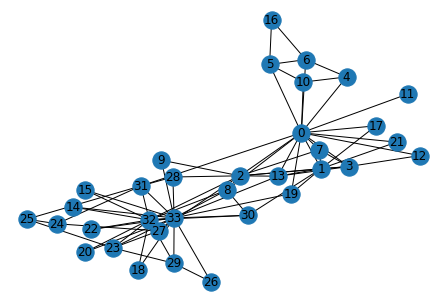

Positive Samples: 
No. of Nodes: 34
No. of Edges: 78

Negative Samples: 
No. of Nodes: 34
No. of Edges: 483




Generating walks (CPU: 1):   0%|          | 0/10 [00:00<?, ?it/s]



Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.30it/s]




Generating walks (CPU: 1):   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.39it/s]


0.6589105129241943


(34, 3)


,node-node,a,b,c,y
76,"(2, 14)",0.201139,0.034932,0.093995,0
555,"(30, 31)",0.454091,-0.019006,0.044969,0
246,"(8, 19)",0.274734,-0.001120,0.041200,0
458,"(19, 22)",0.177191,-0.009026,0.016703,0
36,"(1, 5)",0.576671,0.003064,0.163182,0
387,"(14, 31)",0.221393,0.027868,0.042607,0
191,"(6, 15)",0.267509,0.006963,0.153537,0
509,"(23, 27)",0.206948,0.009180,0.134152,1
158,"(5, 9)",0.272345,-0.004520,0.081964,0
220,"(7, 18)",0.337926,-0.004740,0.049815,0


In [111]:
from itertools import combinations
from node2vec.edges import HadamardEmbedder

edges_embs = HadamardEmbedder(keyed_vectors=model_positive.wv)

# Loading the Karate club graph from Networkx
# Positive sample Karate Graph
KG = nx.karate_club_graph()
KG_positive = KG

# Negative sample Karate Graph
# KG_negative = nx.karate_club_graph()
# all_possible_edges = list(combinations(KG_negative.nodes(), 2))
# edges = list(KG_negative.edges())
# no_edges = list(set(all_possible_edges) - set(edges))
# KG_negative.remove_edges_from(edges)
# KG_negative.add_edges_from(no_edges)

# Plot Karate club with positive sampled edges
nx.draw(KG_positive, with_labels=True)
plt.show()


# Plot Karate club with negative sampled edges
# nx.draw(KG_negative, with_labels=True)
# plt.show()

# Count Prints
print("Positive Samples: ")
print("No. of Nodes: " + str(len(KG_positive.nodes())))
print("No. of Edges: " + str(len(KG_positive.edges())) + "\n")
print("Negative Samples: ")
print("No. of Nodes: " + str(len(KG_negative.nodes())))
print("No. of Edges: " + str(len(KG_negative.edges())))


# Fit embedding model to the Karate Club graph
start = time.time()
n2v_model_positive = Node2Vec(KG_positive, 1, 1, 3)
n2v_model_negative = Node2Vec(KG_negative, 1, 1, 3)
end = time.time()
print(end - start)

# # Embed nodes
model_positive = n2v_model_positive.fit(window=10, min_count=1, batch_words=4)
model_negative = n2v_model_negative.fit(window=10, min_count=1, batch_words=4)

# # Node to vec representation
K8_positive =  model_positive.wv.vectors
# K8_negative = model_negative.wv.vectors
print(K8_positive.shape)
# print(K8_negative.shape)

edges_embs = HadamardEmbedder(keyed_vectors=model_positive.wv)
embeddings = []
for edge in all_possible_edges:
  edge_found = 0
  if KG_positive.has_edge(edge[0], edge[1]):
    edge_found = 1
  edge_tup = tuple(str(x) for x in edge)
  embeddings.append([edge, edges_embs[edge_tup][0], 
                     edges_embs[edge_tup][1], edges_embs[edge_tup][2], 
                     edge_found])

df = pd.DataFrame(embeddings, columns=['node-node', 'a', 'b', 'c', 'y'])
df_randomized = df.sample(frac=1)
df = df_randomized
df


# # Embed positive and negative samples of with their target labels
# embeddings = []

# for id in range(len(KG.nodes)):
#   embedding = K8_positive[id]
#   embeddings.append([embedding[0], embedding[1], embedding[2], 1])

# for id in range(len(KG.nodes)):
#   embedding = K8_negative[id]
#   embeddings.append([embedding[0], embedding[1], embedding[2], 0])
# df = pd.DataFrame(embeddings, columns=['a', 'b', 'c', 'y'])

# df_randomized = df.sample(frac=1)
# df_randomized


# colors = ['red' if x == 'Mr. Hi' else 'blue' for x in df.club]
# nx.draw(KG, with_labels=True, node_color=colors)
# plt.show()

# **Test Train Split**

In [112]:
features = ['a', 'b', 'c']
X = df[features]

Y = df['y']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# **Pass to Classifier**

In [113]:
from sklearn.neural_network import MLPClassifier

classifier = 'MLPClassifier'
clf = MLPClassifier(random_state=1, max_iter=390).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8652482269503546